#CSV analyzer for The New York Times

In [1]:
import blaze
import pandas as pd
from blaze import Data, DataFrame, by, join, merge, odo, into
# from nltk.tokenize import sent_tokenize
from pymongo import MongoClient
# from slugify import slugify
import pickle

In [2]:
total_data = pd.read_csv('../nytimes/rows.csv')

In [3]:
total_data.count()

article_id       1544383
pub_date         1544383
section_name     1544383
web_url          1544383
term_category    1544383
term             1544383
sentence         1544383
dtype: int64

In [5]:
total_data_dedup = total_data.drop_duplicates()

In [24]:
total_data_dedup.count()

article_id       1432978
pub_date         1432978
section_name     1432978
web_url          1432978
term_category    1432978
term             1432978
sentence         1432978
dtype: int64

In [37]:
# Remove
remove_list = ['Become Inc', 'Indeed', 'at&t', 'Signal']

In [10]:
list(total_data_dedup.term.value_counts().items())

[('executive', 296247),
 ('Become Inc', 283621),
 ('manager', 140885),
 ('founder', 81439),
 ('Indeed', 74720),
 ('at&t', 44971),
 ('apple', 40970),
 ('ford', 39614),
 ('twitter', 37697),
 ('Google', 35672),
 ('facebook', 34605),
 ('microsoft', 29673),
 ('Voices.com', 28494),
 ('Signal', 27596),
 ('general motors', 18827),
 ('amazon.com', 18529),
 ('wal-mart', 13781),
 ('entrepreneur', 13041),
 ('visa', 10721),
 ('walt disney company', 9578),
 ('intel corporation', 9208),
 ('boeing', 9075),
 ('ebay', 8978),
 ('coca-cola company', 8243),
 ('general electric', 8179),
 ('Exec', 6026),
 ('nike', 5425),
 ('samsung', 5229),
 ('exxon', 4721),
 ('BERG', 4352),
 ('omnicom group', 4260),
 ('netflix', 3928),
 ('johnson & johnson', 3432),
 ('morgan chase', 2909),
 ('berkshire hathaway', 2782),
 ('mckinsey & company', 2727),
 ('chevron', 2643),
 ('instagram', 2612),
 ('pepsico', 2558),
 ('cisco systems', 2547),
 ('pricewaterhousecoopers', 2527),
 ('halliburton company', 2319),
 ('Nordic', 2315),
 (

In [38]:
for term in remove_list:
    total_data_dedup = total_data_dedup[total_data_dedup['term'] != term]

In [39]:
total_data_dedup.count()

article_id       1002070
pub_date         1002070
section_name     1002070
web_url          1002070
term_category    1002070
term             1002070
sentence         1002070
dtype: int64

In [70]:
# g = total_data_dedup[:100].groupby(['article_id', 'term'])['pub_date', 'section_name', 'web_url', 'term_category', 'sentence']

In [83]:
g = total_data_dedup[:10].groupby(['article_id', 'term'])['sentence']

In [84]:
def contained(series):
    del_index_list = []
    for i1, e1 in series.items():
        for i2, e2 in series.items():
            print(x.index)
    return len(series)

In [91]:
s = total_data_dedup[:10]['sentence']
# for x in :
#     print(type(x))

In [97]:
s.index

Int64Index([0, 1, 2, 4, 5, 6, 8, 10, 11, 12], dtype='int64')

In [85]:
dd=g.aggregate({'len':f})

<built-in method index of str object at 0x7f584814c620>
<built-in method index of str object at 0x7f580832b998>
<built-in method index of str object at 0x7f57e8a32b58>
<built-in method index of str object at 0x7f57e8a27710>
<built-in method index of str object at 0x7f57e8a277c0>
<built-in method index of str object at 0x7f57e8a277c0>
<built-in method index of str object at 0x7f57e9102370>
<built-in method index of str object at 0x7f57e89c91d0>
<built-in method index of str object at 0x7f57e8a32ab0>
<built-in method index of str object at 0x7f58081c6200>


In [80]:
dd

len
article_id               term                    
4fd1e7fa8eb7c8105d73588a manager                1
4fd1e7fc8eb7c8105d735aed entrepreneur           1
4fd1e7fc8eb7c8105d735af6 executive              1
4fd1e8138eb7c8105d735c4a amazon.com             2
                         executive              1
4fd1e8138eb7c8105d735c4b Voices.com             1
                         manager                1
4fd1e8148eb7c8105d735c61 executive              1
4fd1e8188eb7c8105d735fcb manager                2
4fd1e8198eb7c8105d736109 entrepreneur           1
                         executive              1
4fd1e87c8eb7c8105d736cfc manager                1
4fd1e87d8eb7c8105d736e6a manager                1
4fd1f3fc8eb7c8105d74c524 entrepreneur           1
4fd1f3fc8eb7c8105d74c54a entrepreneur           2
4fd1f3fe8eb7c8105d74c6be manager                1
4fd1f3fe8eb7c8105d74c6bf founder                1
4fd1f4018eb7c8105d74c9af entrepreneur           1
4fd1f4068eb7c8105d74ccfb manager                1
4fd1f4068eb7c8105d74ccfe founder                1
4fd1f40b8eb7c8105d74cfbd startup                1
4fd209908eb7c8105d775763 manager                1
4fd209908eb7c8105d775765 executive              1
4fd209958eb7c8105d775ab5 founder                1
                         manager                1
                         walt disney company    1
4fd209fd8eb7c8105d776551 executive              3
                         startup                1
4fd20a068eb7c8105d776ade exxon                  1
                         manager                1
...                                           ...
4fd218968eb7c8105d795cbd entrepreneur           1
4fd218978eb7c8105d795d2b entrepreneur           2
4fd21dd98eb7c8105d79edf0 executive              1
                         founder                1
4fd21ddc8eb7c8105d79ef84 manager                2
4fd21ddc8eb7c8105d79ef92 executive              1
                         manager                1
4fd21ddc8eb7c8105d79f029 entrepreneur           1
                         executive              5
                         ford                   1
4fd21ddf8eb7c8105d79f1c1 entrepreneur           1
4fd21f858eb7c8105d7a249e manager                1
4fd21f878eb7c8105d7a258a manager                1
4fd223d18eb7c8105d7a99f7 founder                1
4fd223da8eb7c8105d7a9f69 entrepreneur           1
4fd292988eb7c8105d86c069 Twitpic                1
                         facebook               2
4fd392158eb7c8105d8c3e07 manager                1
4fd396f28eb7c8105d8cecea facebook               2
4fd398718eb7c8105d8d2cba facebook               1
4fd399128eb7c8105d8d476c executive              1
4fd399cc8eb7c8105d8d6274 executive              1
                         general motors         1
535b12a538f0d80f3c8b6197 apple                  2
535bc26538f0d80f3c8b626a inBloom                2
54455cd038f0d832c813eaa3 executive              1
                         manager                1
5456ab1438f0d86ef22a094e executive              2
5482d92a38f0d8403d9cd045 Twitch                 1
548bb0a038f0d8482929b632 founder                1

[80 rows x 1 columns]

In [28]:
sum(total_data_dedup.article_id.value_counts() > 1)

338522

In [13]:
total_data_dedup[total_data_dedup.term == 'apple']

,article_id,pub_date,section_name,web_url,term_category,term,sentence
124,535b12a538f0d80f3c8b6197,2014-04-26T00:00:00Z,Technology,http://www.nytimes.com/2014/04/26/technology/a...,2,apple,Apple offers to replace faulty on-off buttons ...
125,535b12a538f0d80f3c8b6197,2014-04-26T00:00:00Z,Technology,http://www.nytimes.com/2014/04/26/technology/a...,2,apple,Apple Will Replace Faulty Switches on iPhone 5
126,535b12a538f0d80f3c8b6197,2014-04-26T00:00:00Z,Technology,http://www.nytimes.com/2014/04/26/technology/a...,2,apple,Apple has offered to replace faulty on-off but...
128,535b12a538f0d80f3c8b6197,2014-04-26T00:00:00Z,Technology,http://www.nytimes.com/2014/04/26/technology/a...,2,apple,Apple said on its user-support page
514,4fd399e48eb7c8105d8d6632,2010-03-23T15:23:14Z,Technology,http://gadgetwise.blogs.nytimes.com/2010/03/23...,2,apple,Two popular sites for travel information have ...
515,4fd399e48eb7c8105d8d6632,2010-03-23T15:23:14Z,Technology,http://gadgetwise.blogs.nytimes.com/2010/03/23...,2,apple,iPhone apps -- welcome aids to people who are ...
749,4fd20a078eb7c8105d776b4e,1999-02-22T00:00:00Z,Technology; Business,http://www.nytimes.com/1999/02/22/business/tec...,2,apple,That can mean for instance that a client who a...
796,4fd20a068eb7c8105d776a58,1999-02-25T00:00:00Z,Technology,http://www.nytimes.com/1999/02/25/technology/y...,2,apple,Mr. Leifer of Borough Park Brooklyn is about f...
866,4fd245428eb7c8105d7dfcd2,2000-09-08T00:00:00Z,Movies; Arts; Theater,http://www.nytimes.com/2000/09/08/movies/theat...,2,apple,of the Henson International Festival of Puppet...
890,4fd1e7fa8eb7c8105d7358f0,1999-01-14T00:00:00Z,Technology; Business,http://www.nytimes.com/1999/01/14/business/com...,2,apple,Apple Computer Inc reports earnings gain in fi...


In [14]:
r_1720 = total_data_dedup.ix[1720]

In [15]:
r_1721 = total_data_dedup.ix[1721]

In [16]:
r_1720

article_id                                4fd209968eb7c8105d775ba5
pub_date                                      1999-01-06T00:00:00Z
section_name                                  Technology; Business
web_url          http://www.nytimes.com/1999/01/06/business/new...
term_category                                                    2
term                                                         apple
sentence         Unveiling a colorful array of sleek machines t...
Name: 1720, dtype: object

In [17]:
r_1721

article_id                                4fd209968eb7c8105d775ba5
pub_date                                      1999-01-06T00:00:00Z
section_name                                  Technology; Business
web_url          http://www.nytimes.com/1999/01/06/business/new...
term_category                                                    2
term                                                         apple
sentence         Unveiling a colorful array of sleek machines t...
Name: 1721, dtype: object

In [20]:
for i in r_1720.index:
    if r_1720[i] != r_1721[i]:
        print(r_1720[i])
        print(r_1721[i])

Unveiling a colorful array of sleek machines that more closely resemble a pack of Life Savers than a new computer line Apple Computer's interim chief executive Steven P. Jobs today introduced the second generation of the company's popular iMac computers.
Unveiling a colorful array of sleek machines that more closely resemble a pack of Life Savers than a new computer line Apple Computer's interim chief executive Steven P. Jobs today introduced the second generation of the


In [304]:
xx=pd.Series([1,2,3], index=['a','b','c'])

In [305]:
xx

a    1
b    2
c    3
dtype: int64

In [311]:
list(xx.items())

[('a', 1), ('b', 2), ('c', 3)]

In [312]:
for x in xx.items():
    print(x)

('a', 1)
('b', 2)
('c', 3)


In [18]:
# total_rows_data = Data('total_rows_26.csv', delimiter=',')

In [260]:
type(total_rows_data.dshape)

datashape.coretypes.DataShape

In [20]:
total_rows_distinct = total_rows_data.distinct()

In [19]:
total_rows_data.count()

452654

In [21]:
total_rows_distinct.count()

411204

In [22]:
total_rows_distinct.term.count_values()

,term,count
108,executive,81788
131,manager,51197
10,Become Inc,44908
114,founder,41676
113,ford,19257
25,Google,18508
84,apple,12465
83,amazon.com,11780
86,at&t,9454
31,Indeed,8825


In [26]:
data = total_rows_distinct

In [34]:
data = data[data.term != 'Become Inc']
data = data[data.term != 'Indeed']
data = data[data.term != 'ebay'] # change term_category from 3 to 2

In [35]:
data

,article_id,pub_date,section_name,web_url,term_category,term,sentence
0,4fd20d7d8eb7c8105d77daf9,1999-01-16,Sports,http://www.nytimes.com/1999/01/16/sports/plus-...,1,new venture,Keeneland's new venture came as a surprise to ...
1,4fd20db88eb7c8105d77e511,1999-01-03,Arts; Books,http://www.nytimes.com/1999/01/03/books/heartb...,1,manager,The plan Presley and his hucksterish business ...
3,5482d92a38f0d8403d9cd045,2008-07-08,Science,http://www.nytimes.com/2008/07/08/science/08an...,2,Twitch,In the male toadfish the swimbladder has been ...
4,5456ab1438f0d86ef22a094e,2009-10-04,Real Estate,http://www.nytimes.com/2009/10/04/realestate/c...,1,executive,Mr. Pozycki is the chief executive of SJP Prop...
5,5456ab1438f0d86ef22a094e,2009-10-04,Real Estate,http://www.nytimes.com/2009/10/04/realestate/c...,1,executive,Mr. Pozycki 59 is the chief executive of SJP P...
6,4fd20db88eb7c8105d77e4c8,1999-01-07,Paid Death Notices,http://www.nytimes.com/1999/01/07/classified/p...,1,startup,A pioneering entrepreneur he was successful in...
7,4fd20db88eb7c8105d77e4c8,1999-01-07,Paid Death Notices,http://www.nytimes.com/1999/01/07/classified/p...,1,entrepreneur,A pioneering entrepreneur he was successful in...
8,4fd209fd8eb7c8105d776551,1999-01-10,New York and Region,http://www.nytimes.com/1999/01/10/nyregion/roa...,1,startup,There are also startup costs which Governor Wh...
9,4fd209fd8eb7c8105d776551,1999-01-10,New York and Region,http://www.nytimes.com/1999/01/10/nyregion/roa...,1,executive,There are two chief and two executive director...
10,4fd209fd8eb7c8105d776551,1999-01-10,New York and Region,http://www.nytimes.com/1999/01/10/nyregion/roa...,1,executive,When the newly formed North Hudson Regional Fi...


In [36]:
data.count()

354705

In [29]:
data.term.count_values()

,term,count
106,executive,81788
129,manager,51197
112,founder,41676
111,ford,19257
24,Google,18508
82,apple,12465
81,amazon.com,11780
84,at&t,9454
105,entrepreneur,8484
169,visa,8398


In [60]:
by(data.sentence, unique=data.term.nunique() == 1)

,sentence,unique
0,\t International Paper posted a better-than-e...,True
1,"""Poor Aim"" (Sophie Morner) With Liza Minnell...",True
2,ALL IS FAIR IN LOVE AND TWITTER If there’s o...,True
3,Hedge-crickets sing; and now with treble sof...,True
4,Q. I sometimes need to type foot and inch ma...,True
5,YOU want a trip to Kellogg — the birthplace ...,True
6,"""Angel investors typically earn 5 to 10 times...",True
7,"""Celebration Day"" depicts the tribute concert...",True
8,"""It looks like Congressman Knollenberg is run...",True
9,"""It's a poor man's dinner eaten with eggs or ...",True


In [41]:
odo(data, 'curated_data.csv')

In [76]:
curated_data = Data('curated_data.csv', delimiter=',')

In [77]:
curated_data

,article_id,pub_date,section_name,web_url,term_category,term,sentence
0,4fd20d7d8eb7c8105d77daf9,1999-01-16,Sports,http://www.nytimes.com/1999/01/16/sports/plus-...,1,new venture,Keeneland's new venture came as a surprise to ...
1,4fd20db88eb7c8105d77e511,1999-01-03,Arts; Books,http://www.nytimes.com/1999/01/03/books/heartb...,1,manager,The plan Presley and his hucksterish business ...
2,5482d92a38f0d8403d9cd045,2008-07-08,Science,http://www.nytimes.com/2008/07/08/science/08an...,2,Twitch,In the male toadfish the swimbladder has been ...
3,5456ab1438f0d86ef22a094e,2009-10-04,Real Estate,http://www.nytimes.com/2009/10/04/realestate/c...,1,executive,Mr. Pozycki is the chief executive of SJP Prop...
4,5456ab1438f0d86ef22a094e,2009-10-04,Real Estate,http://www.nytimes.com/2009/10/04/realestate/c...,1,executive,Mr. Pozycki 59 is the chief executive of SJP P...
5,4fd20db88eb7c8105d77e4c8,1999-01-07,Paid Death Notices,http://www.nytimes.com/1999/01/07/classified/p...,1,startup,A pioneering entrepreneur he was successful in...
6,4fd20db88eb7c8105d77e4c8,1999-01-07,Paid Death Notices,http://www.nytimes.com/1999/01/07/classified/p...,1,entrepreneur,A pioneering entrepreneur he was successful in...
7,4fd209fd8eb7c8105d776551,1999-01-10,New York and Region,http://www.nytimes.com/1999/01/10/nyregion/roa...,1,startup,There are also startup costs which Governor Wh...
8,4fd209fd8eb7c8105d776551,1999-01-10,New York and Region,http://www.nytimes.com/1999/01/10/nyregion/roa...,1,executive,There are two chief and two executive director...
9,4fd209fd8eb7c8105d776551,1999-01-10,New York and Region,http://www.nytimes.com/1999/01/10/nyregion/roa...,1,executive,When the newly formed North Hudson Regional Fi...


In [46]:
with open('sentiment/be.pickle', 'rb') as be_file:
    be = pickle.load(be_file)

In [52]:
be.predict(['My puppy is cute.', 'People die in war.', 'I love my family.'])

array(['pos', 'neg', 'pos'], dtype=object)

In [72]:
sents_df = odo(data.sentence.map(lambda x: be.predict([x])[0], '?string'), DataFrame)

In [83]:
data_df = odo(data, DataFrame)

In [73]:
# sents_df.to_csv('26_sentiments.csv')

In [84]:
sents_df.count()

sentence    354705
dtype: int64

In [85]:
data_df.count()

article_id       354705
pub_date         354705
section_name     350989
web_url          354705
term_category    354705
term             354705
sentence         354705
dtype: int64

In [86]:
data_df['sentiment'] = sents_df

In [88]:
data_df.head()

,article_id,pub_date,section_name,web_url,term_category,term,sentence,sentiment
0,4fd20d7d8eb7c8105d77daf9,1999-01-16,Sports,http://www.nytimes.com/1999/01/16/sports/plus-...,1,new venture,Keeneland's new venture came as a surprise to ...,pos
1,4fd20db88eb7c8105d77e511,1999-01-03,Arts; Books,http://www.nytimes.com/1999/01/03/books/heartb...,1,manager,The plan Presley and his hucksterish business ...,pos
3,5482d92a38f0d8403d9cd045,2008-07-08,Science,http://www.nytimes.com/2008/07/08/science/08an...,2,Twitch,In the male toadfish the swimbladder has been ...,pos
4,5456ab1438f0d86ef22a094e,2009-10-04,Real Estate,http://www.nytimes.com/2009/10/04/realestate/c...,1,executive,Mr. Pozycki is the chief executive of SJP Prop...,pos
5,5456ab1438f0d86ef22a094e,2009-10-04,Real Estate,http://www.nytimes.com/2009/10/04/realestate/c...,1,executive,Mr. Pozycki 59 is the chief executive of SJP P...,pos


In [105]:
# resamp = data_df.set_index('pub_date').groupby('term_category').resample('M', how='sum')

In [122]:
# resamp

In [139]:
from datetime import datetime

def diff_month(d1, d2):
    return (d2.year - d1.year) * 12 + d2.month - d1.month

assert diff_month(datetime(2010,9,1), datetime(2010,10,1)) == 1
assert diff_month(datetime(2009,10,1), datetime(2010,10,1)) == 12
assert diff_month(datetime(2009,11,1), datetime(2010,10,1)) == 11
assert diff_month(datetime(2009,8,1), datetime(2010,10,1)) == 14

In [140]:
diff_month(datetime(2010,10,1), datetime(2010,11,30))

1

In [121]:
datetime.strptime('2010-10-1', '%Y-%m-%d')

datetime.datetime(2010, 10, 1, 0, 0)

In [137]:
data_df['n_month'] = data_df['pub_date'].apply(lambda x: diff_month(datetime(1999, 1, 1), x.date()))

In [138]:
data_df.head()

,article_id,pub_date,section_name,web_url,term_category,term,sentence,sentiment,n_month
0,4fd20d7d8eb7c8105d77daf9,1999-01-16,Sports,http://www.nytimes.com/1999/01/16/sports/plus-...,1,new venture,Keeneland's new venture came as a surprise to ...,pos,0
1,4fd20db88eb7c8105d77e511,1999-01-03,Arts; Books,http://www.nytimes.com/1999/01/03/books/heartb...,1,manager,The plan Presley and his hucksterish business ...,pos,0
3,5482d92a38f0d8403d9cd045,2008-07-08,Science,http://www.nytimes.com/2008/07/08/science/08an...,2,Twitch,In the male toadfish the swimbladder has been ...,pos,114
4,5456ab1438f0d86ef22a094e,2009-10-04,Real Estate,http://www.nytimes.com/2009/10/04/realestate/c...,1,executive,Mr. Pozycki is the chief executive of SJP Prop...,pos,129
5,5456ab1438f0d86ef22a094e,2009-10-04,Real Estate,http://www.nytimes.com/2009/10/04/realestate/c...,1,executive,Mr. Pozycki 59 is the chief executive of SJP P...,pos,129


In [141]:
data2 = Data(data_df)

In [142]:
by(data2.term_category,
   total_amount=data2.sentiment.count(),
   amount_pos=data2[data2.sentiment == 'pos'].sentiment.count(),
   amount_neg=data2[data2.sentiment == 'neg'].sentiment.count()
)

,term_category,amount_neg,amount_pos,total_amount
0,1,72041,113193,185234
1,2,48605,109181,157786
2,3,3063,8622,11685


In [195]:
%matplotlib inline

In [201]:
xx = by(merge(data2.term, data2.n_month),
   total_amount=data2.sentiment.count(),
   amount_pos=data2[data2.sentiment == 'pos'].sentiment.count(),
   amount_neg=data2[data2.sentiment == 'neg'].sentiment.count()
)

In [231]:
dd = odo(xx[xx.term == 'Google'], DataFrame)

In [232]:
dd.set_index('n_month', inplace=True)

In [233]:
dd.index = [datetime.strptime("1999-01-01", "%Y-%m-%d") + relativedelta(months=i) for i in dd.index]

In [234]:
dd['amount_neg_rate'] = dd['amount_neg'] / dd['total_amount']
dd['amount_pos_rate'] = dd['amount_pos'] / dd['total_amount']

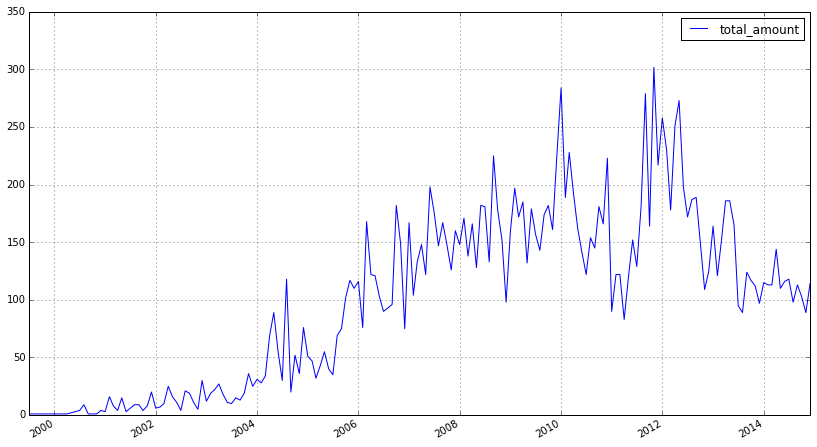

In [239]:
dd[['total_amount']].plot(figsize=(14,8))

In [172]:
from dateutil.relativedelta import relativedelta

In [178]:
dd.index = ind